In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt
import matplotlib.animation as animation

data = pd.read_csv('perc.csv')
x = data['Category']
y = data['Per Capita Consumption']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

In [10]:
alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2)

In [11]:
#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        print(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

#Pass the relevant variables to the function and get the new values
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent values for intercept and slope: {:.2f}, {:.2f}".format(theta[0], theta[1]))

[0.27117998 0.36568869 0.46019741 0.55470612 0.64921483 0.74372354
 0.83823225 0.93274097 1.02724968 1.12175839]
[5.89882926 6.29442375 6.69001825 7.08561275 7.48120725 7.87680174
 8.27239624 8.66799074 9.06358523 9.45917973]
[11.46884715 12.16281766 12.85678817 13.55075868 14.24472919 14.9386997
 15.63267021 16.32664072 17.02061123 17.71458174]
[16.98182218 17.97148332 18.96114446 19.9508056  20.94046673 21.93012787
 22.91978901 23.90945015 24.89911129 25.88877243]
[22.43833684 23.7210274  25.00371795 26.2864085  27.56909905 28.85178961
 30.13448016 31.41717071 32.69986127 33.98255182]
[27.83896773 29.41205043 30.98513313 32.55821584 34.13129854 35.70438124
 37.27746394 38.85054664 40.42362934 41.99671204]
[33.18428555 35.04514687 36.90600819 38.76686951 40.62773083 42.48859215
 44.34945347 46.21031479 48.07117611 49.93203743]
[38.47485518 40.62090511 42.76695504 44.91300498 47.05905491 49.20510484
 51.35115477 53.49720471 55.64325464 57.78930457]
[43.71123577 46.13990761 48.56857946 

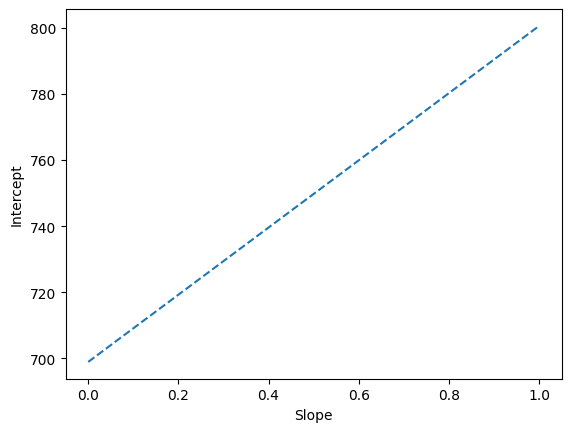

In [12]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.xlabel("Slope")
    plt.ylabel("Intercept")
    plt.plot(x_vals, y_vals, '--')
    plt.show()
abline(101.57,698.95)    

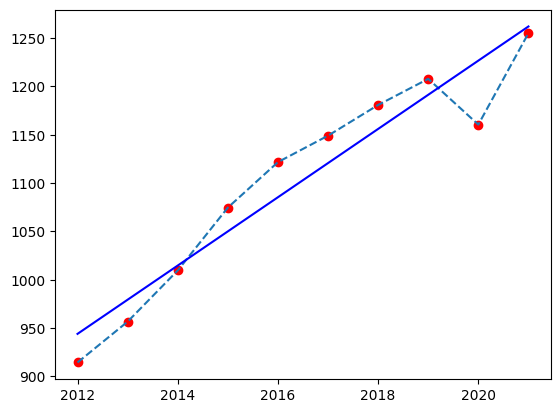

In [19]:
data = pd.read_csv('plot 2 per-capita-consumption.csv')
x = data['Category']
y = data['Per Capita Consumption']
plt.scatter(x=X, y=y, color='red')




# Find the slope and intercept of the best fit line
slope, intercept = np.polyfit(x, y, 1)

# Create a list of values in the best fit line
abline_values = [slope * i + intercept for i in x]

# Plot the best fit line over the actual values
plt.plot(x, y, '--')
plt.plot(x, abline_values, 'b')

plt.show()

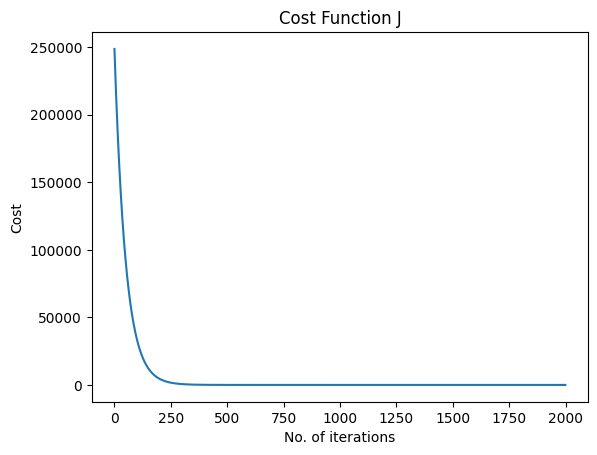

In [ ]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

KeyError: 'key of type tuple not found and not a MultiIndex'

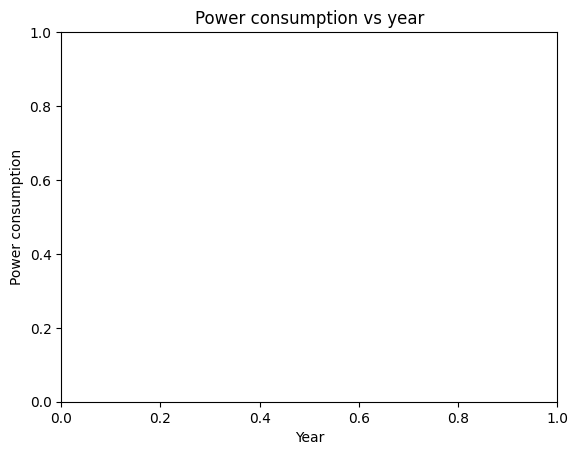

In [ ]:
#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Power consumption vs year')
plt.xlabel('Year')
plt.ylabel('Power consumption')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()


In [ ]:
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)

MovieWriter imagemagick unavailable; using Pillow instead.



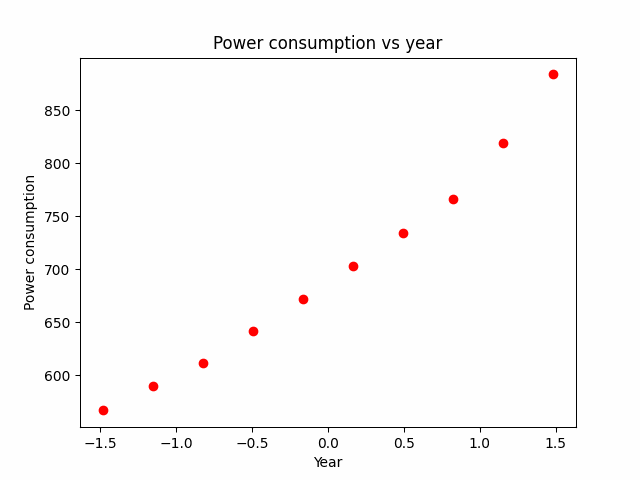

In [ ]:
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))